In [1]:
# Import dependencies
import os
import numpy as np
import gymnasium as gym
from gymnasium import spaces
from gymnasium.wrappers import RescaleAction
from gymnasium.envs import register

import torch

import ray
from ray import tune
from ray.tune.registry import register_env
from ray.air import RunConfig
from ray.rllib.algorithms.ppo import PPOConfig
from ray.rllib.algorithms.ppo import PPO
from ray.rllib.algorithms.algorithm import Algorithm
from ray.rllib.algorithms.algorithm_config import AlgorithmConfig

from scipy.spatial.transform import Rotation as R

from ray import air
from ray import tune

# Import modules
from Environment_Creator import env_creator

In [2]:
config = None

Doc basic test:

In [6]:
from SpacecraftOrbitalEnv import SpacecraftOrbitalEnv

config = (
    PPOConfig()
    .environment(
        SpacecraftOrbitalEnv,
        env_config={},  # `config` to pass to your env class
    )
    .env_runners(num_env_runners=2)
    .training(gamma=0.9, lr=0.01, train_batch_size_per_learner=1000)
)

results = tune.Tuner(
    "PPO",
    run_config=air.RunConfig(stop={"training_iteration": 100}),
    param_space=config,
).fit()

2025-02-04 21:18:12,091	WARNING algorithm_config.py:4726 -- You are running PPO on the new API stack! This is the new default behavior for this algorithm. If you don't want to use the new API stack, set `config.api_stack(enable_rl_module_and_learner=False,enable_env_runner_and_connector_v2=False)`. For a detailed migration guide, see here: https://docs.ray.io/en/master/rllib/new-api-stack-migration-guide.html
2025-02-04 21:18:12,093	WARNING algorithm_config.py:4726 -- You are running PPO on the new API stack! This is the new default behavior for this algorithm. If you don't want to use the new API stack, set `config.api_stack(enable_rl_module_and_learner=False,enable_env_runner_and_connector_v2=False)`. For a detailed migration guide, see here: https://docs.ray.io/en/master/rllib/new-api-stack-migration-guide.html
2025-02-04 21:28:51,257	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to 'C:/Users/zhech/ray_results/PPO_2025-02-04_21-18-12' in 0.03

In [7]:
# Get the best result based on a particular metric.
best_result = results.get_best_result(
    metric="env_runners/episode_return_mean", mode="max"
)
best_checkpoint = best_result.checkpoint

In [8]:
algo = Algorithm.from_checkpoint(best_checkpoint.path)

2025-02-04 21:31:01,702	WARNING algorithm_config.py:4726 -- You are running PPO on the new API stack! This is the new default behavior for this algorithm. If you don't want to use the new API stack, set `config.api_stack(enable_rl_module_and_learner=False,enable_env_runner_and_connector_v2=False)`. For a detailed migration guide, see here: https://docs.ray.io/en/master/rllib/new-api-stack-migration-guide.html
C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\rllib\algorithms\algorithm.py:574: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
C:\Users\zhech\AppData\Local\Programs\Python\Python310\lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releas

In [9]:
# Access the metrics dataframe
metrics_df = best_result.metrics_dataframe

In [10]:
metrics_df

,num_training_step_calls_per_iteration,num_env_steps_sampled_lifetime,num_env_steps_sampled_lifetime_throughput,done,training_iteration,trial_id,date,timestamp,time_this_iter_s,time_total_s,...,config/input,config/policies/default_policy,config/callbacks,config/create_env_on_driver,config/custom_eval_function,config/framework,perf/cpu_util_percent,perf/ram_util_percent,timers/synch_env_connectors,env_runners/time_between_sampling
0,1,1000,NaN,False,1,c6882_00000,2025-02-04_21-18-43,1738696723,4.780957,4.780957,...,sampler,"[None, None, None, None]",<class 'ray.rllib.callbacks.callbacks.RLlibCal...,False,None,torch,8.185714,76.814286,NaN,NaN
1,1,2000,207.043864,False,2,c6882_00000,2025-02-04_21-18-48,1738696728,4.794197,9.575154,...,sampler,"[None, None, None, None]",<class 'ray.rllib.callbacks.callbacks.RLlibCal...,False,None,torch,9.914286,76.842857,0.015636,3.430063
2,1,3000,214.788705,False,3,c6882_00000,2025-02-04_21-18-53,1738696733,4.639971,14.215125,...,sampler,"[None, None, None, None]",<class 'ray.rllib.callbacks.callbacks.RLlibCal...,False,None,torch,9.266667,76.800000,0.015588,3.430059
3,1,4000,162.008173,False,4,c6882_00000,2025-02-04_21-18-59,1738696739,6.147527,20.362653,...,sampler,"[None, None, None, None]",<class 'ray.rllib.callbacks.callbacks.RLlibCal...,False,None,torch,10.666667,76.900000,0.015586,3.430030
4,1,5000,164.854955,False,5,c6882_00000,2025-02-04_21-19-05,1738696745,6.041989,26.404641,...,sampler,"[None, None, None, None]",<class 'ray.rllib.callbacks.callbacks.RLlibCal...,False,None,torch,9.062500,76.800000,0.015562,3.430274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,96000,162.118395,False,96,c6882_00000,2025-02-04_21-28-26,1738697306,6.145897,585.169692,...,sampler,"[None, None, None, None]",<class 'ray.rllib.callbacks.callbacks.RLlibCal...,False,None,torch,9.200000,75.511111,0.014541,3.933452
96,1,97000,163.018112,False,97,c6882_00000,2025-02-04_21-28-33,1738697313,6.115574,591.285265,...,sampler,"[None, None, None, None]",<class 'ray.rllib.callbacks.callbacks.RLlibCal...,False,None,torch,9.066667,75.544444,0.014529,3.939948
97,1,98000,164.768044,False,98,c6882_00000,2025-02-04_21-28-39,1738697319,6.031805,597.317070,...,sampler,"[None, None, None, None]",<class 'ray.rllib.callbacks.callbacks.RLlibCal...,False,None,torch,9.475000,75.400000,0.014548,3.946424
98,1,99000,167.610273,False,99,c6882_00000,2025-02-04_21-28-45,1738697325,5.939646,603.256716,...,sampler,"[None, None, None, None]",<class 'ray.rllib.callbacks.callbacks.RLlibCal...,False,None,torch,8.925000,75.450000,0.014545,3.952864


In [11]:
# Print or inspect the metrics
print(metrics_df.head())

   num_training_step_calls_per_iteration  num_env_steps_sampled_lifetime  \
0                                      1                            1000   
1                                      1                            2000   
2                                      1                            3000   
3                                      1                            4000   
4                                      1                            5000   

   num_env_steps_sampled_lifetime_throughput   done  training_iteration  \
0                                        NaN  False                   1   
1                                 207.043864  False                   2   
2                                 214.788705  False                   3   
3                                 162.008173  False                   4   
4                                 164.854955  False                   5   

      trial_id                 date   timestamp  time_this_iter_s  \
0  c6882_00000  2025-02

In [12]:
metrics_df["training_iteration"]

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: training_iteration, Length: 100, dtype: int64

In [13]:
metrics_df["env_runners/episode_return_mean"]

0    -947.665958
1    -935.480603
2    -906.283154
3    -878.246392
4    -856.983054
         ...    
95   -689.751033
96   -689.749496
97   -689.751186
98   -689.746883
99   -689.747959
Name: env_runners/episode_return_mean, Length: 100, dtype: float64

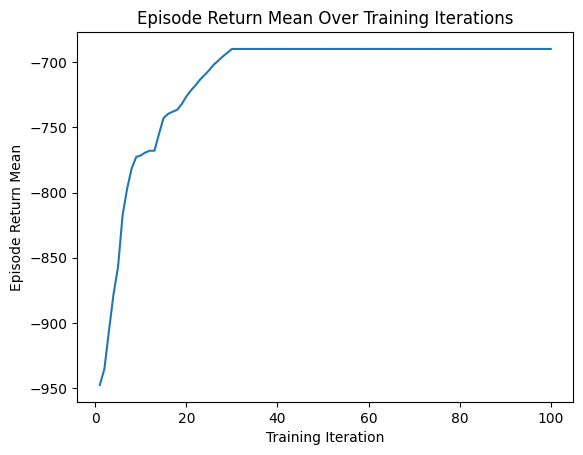

In [14]:
# Plot key metrics
import matplotlib.pyplot as plt

# Example: Plot episode return mean over training iterations
plt.plot(metrics_df["training_iteration"], metrics_df["env_runners/episode_return_mean"])
plt.xlabel("Training Iteration")
plt.ylabel("Episode Return Mean")
plt.title("Episode Return Mean Over Training Iterations")
plt.show()

In [ ]:
policy = algo.get_policy()